## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "turbineEnthalpyVsInternalEnergy",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Control Volumes",
    "lecture_reference": {
        "lecture_id": "1_0r6wkz1o",
        "subtopics": [
            {
              "key": "Fa25-L5a-4.0",
              "title": "Applying conservation of mass and energy principles for a control volume to a turbine.",
            }
        ]
    },
    "book_reference": {
              "chapter_number": 5,
              "title": "Mass and Energy Analysis of Control Volumes",
        "sections": [
            "Some Steady-Flow Engineering Devices",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
Steam enters a turbine at 4600 kg/hr and a pressure of 60 bar and 400$^\circ$C and exits at 0.2 bar and a vapor quality of 0.9. 

**Goal**: 
* Determine the shaft power and the total power transferred from the system.

## 2. Schematic
Draw a control volume. One control volume for the iron block (CV1). Another control volume for the water bath (CV2).

## 3. Assumptions and Approximations
* Neglect kinetic and potential energy
* Steady-flow system
* Determine properties using `pyCalor`
    
## 4. Physical Laws and Governing Equations
The shaft work is:

$$ \dot{W}_\text{S,out} = \dot{m} \left(h_1 - h_2 \right)$$

The overall work transferred out is:

$$ \dot{W}_\text{net,out} = \dot{m} (u_1 - u_2)$$

What we see from this is that:

$$ \dot{W}_\text{S,out} \ne \dot{W}_\text{net,out} $$

In [1]:
## 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

# A steam turbine operates with the conditions listed below. 
mdot_kgPerHr = 4600
# conversion
mdot_kgPerS = mdot_kgPerHr/(60*60)

# state 1
p1_bar = 60
T1_C = 400
st1 = th.state('water',T=(T1_C,'C'),p=(p1_bar,'bar'),name='1')

# state 2
p2_bar = 0.2
x2 = 0.9
st2 = th.state('water',x=x2,p=(p2_bar,'bar'),name='2')

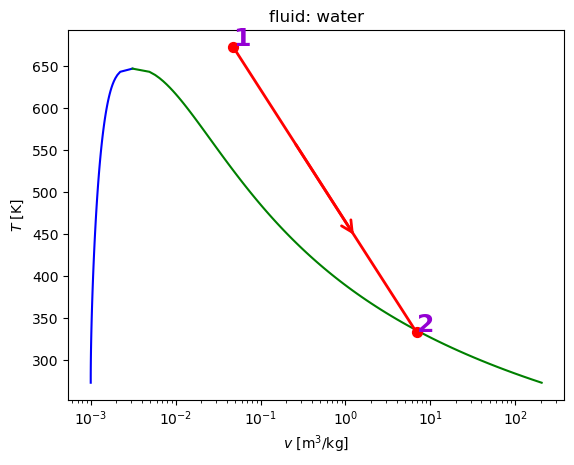

1028724.3599696202
841.0739174317023


In [2]:
# 6 Calculations (Code Cell)
# process
pr = th.process([(st1,st2)])

# T-v plot
pr.plot('Tv')

# Answer: part (a)
W_shaft_out_kW = mdot_kgPerS*(1000*(st1.h-st2.h)); print(W_shaft_out_kW)

# Answer: part (b)
W_total_out_kW = mdot_kgPerS*(st1.u-st2.u); print(W_total_out_kW)

## 7. Summary and Reasoning
The total work is different from the shaft work because the total work contains flow work.